# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
import pandas as pd

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel('Online Retail.xlsx')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Task 2: Clean the Data

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.dropna(subset=['CustomerID', 'Description'], inplace=True)

In [7]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

## Task 3: Basic Statistics

In [8]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

## Task 4: Perform data visualization to gain insights into the dataset

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

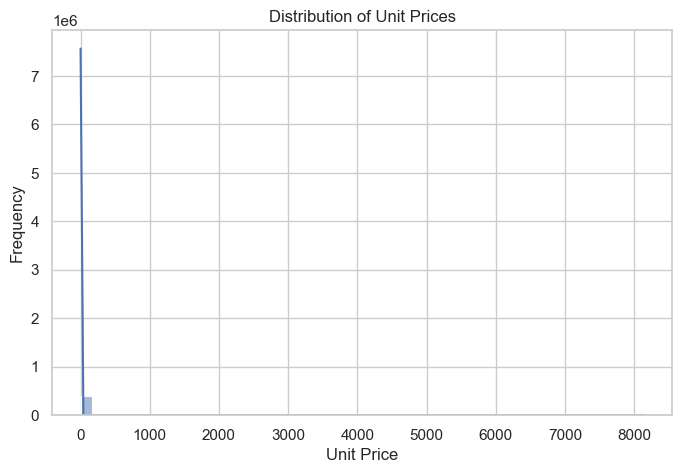

In [11]:
# 1. Histogram – Distribution of Unit Prices
plt.figure(figsize=(8, 5))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

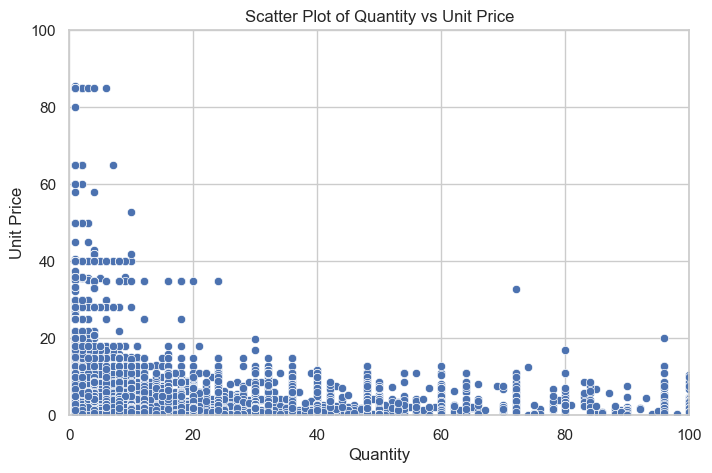

In [12]:
# 2. Scatter Plot – Quantity vs Unit Price (to detect outliers)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df)
plt.title('Scatter Plot of Quantity vs Unit Price')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

/var/folders/c1/ypskr8394dlf3rvwrjmf4g940000gn/T/ipykernel_2097/4181906458.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


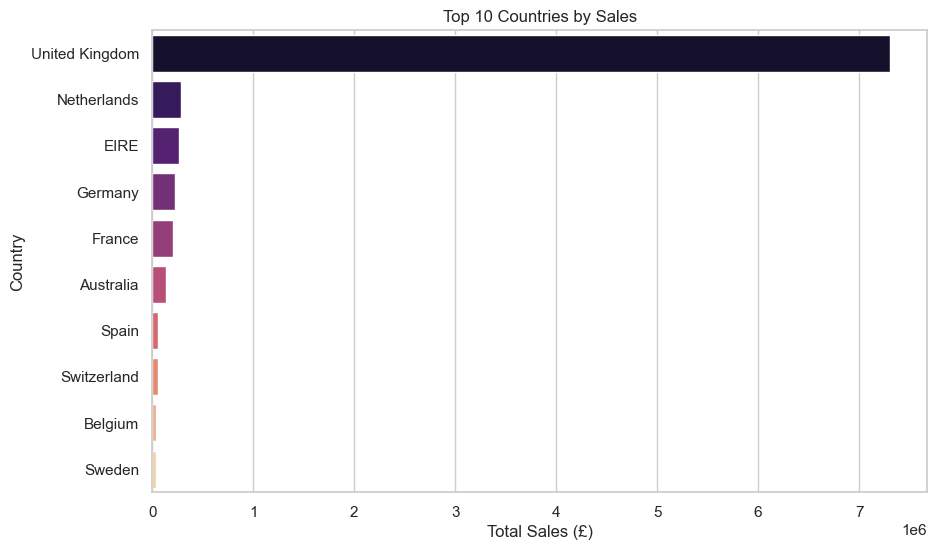

In [13]:
# 3. Bar Plot – Top 10 Countries by Total Sales
df['Sales'] = df['Quantity'] * df['UnitPrice']
top_countries = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('Top 10 Countries by Sales')
plt.xlabel('Total Sales (£)')
plt.ylabel('Country')
plt.show()

## Task 5: Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.

In [14]:
#sales trend

In [15]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

df.reset_index(inplace=True)

# Extract Month and Weekday
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Weekday'] = df['InvoiceDate'].dt.day_name()

In [16]:
#Monthly Sales Trend

/var/folders/c1/ypskr8394dlf3rvwrjmf4g940000gn/T/ipykernel_2097/2493778299.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='Blues')


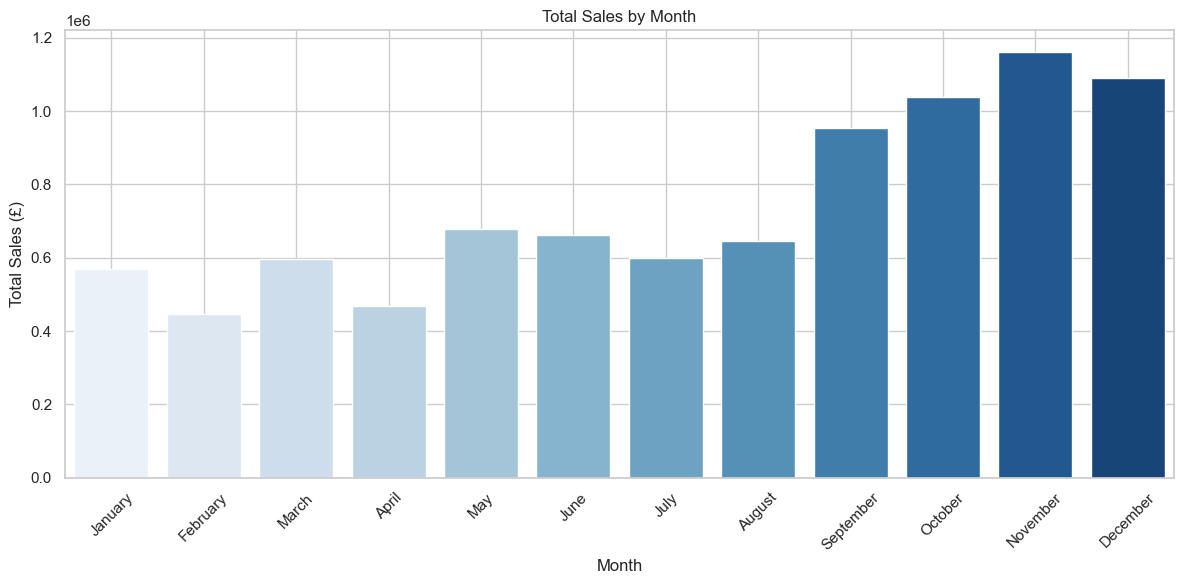

In [17]:
monthly_sales = df.groupby('Month')['Sales'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.figure(figsize=(12,6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='Blues')
plt.title('Total Sales by Month')
plt.ylabel('Total Sales (£)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
#Weekday Sales Trend

/var/folders/c1/ypskr8394dlf3rvwrjmf4g940000gn/T/ipykernel_2097/2685271127.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='Oranges')


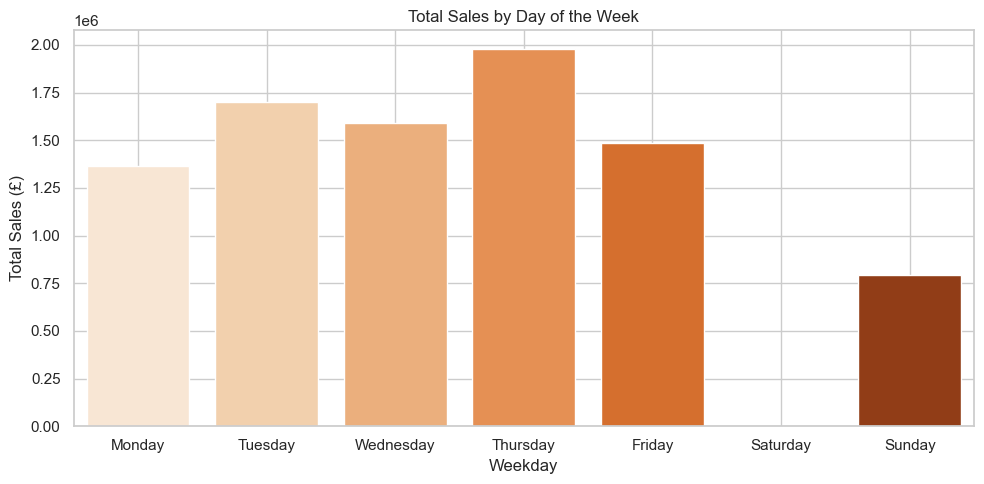

In [19]:
weekday_sales = df.groupby('Weekday')['Sales'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(10,5))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='Oranges')
plt.title('Total Sales by Day of the Week')
plt.ylabel('Total Sales (£)')
plt.xlabel('Weekday')
plt.grid(True)
plt.tight_layout()
plt.show()

## Task 6: Explore the top-selling products and countries based on the quantity sold.

In [20]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

/var/folders/c1/ypskr8394dlf3rvwrjmf4g940000gn/T/ipykernel_2097/3141970463.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


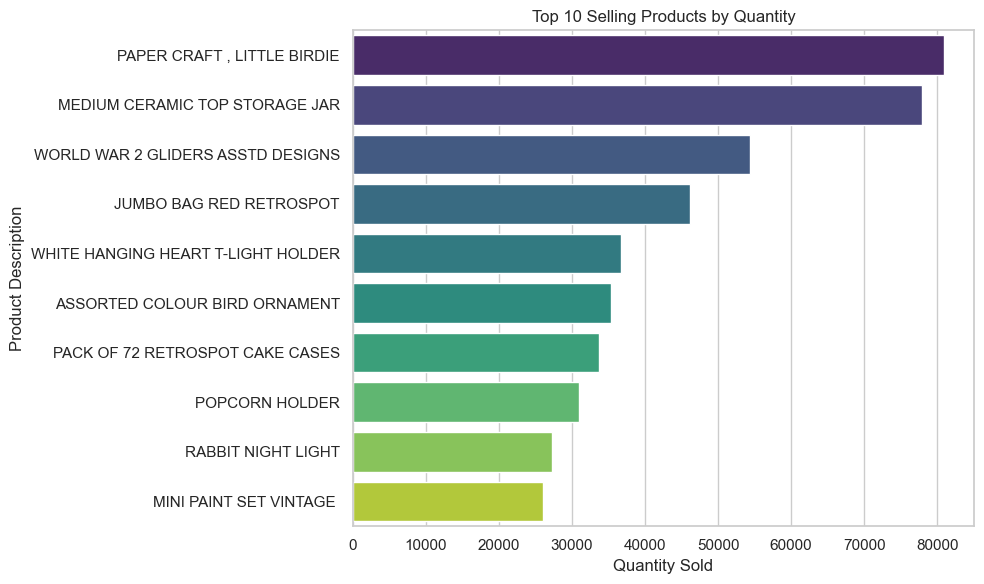

In [21]:
#Top-Selling Products by Quantity
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Selling Products by Quantity')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

/var/folders/c1/ypskr8394dlf3rvwrjmf4g940000gn/T/ipykernel_2097/1216733917.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


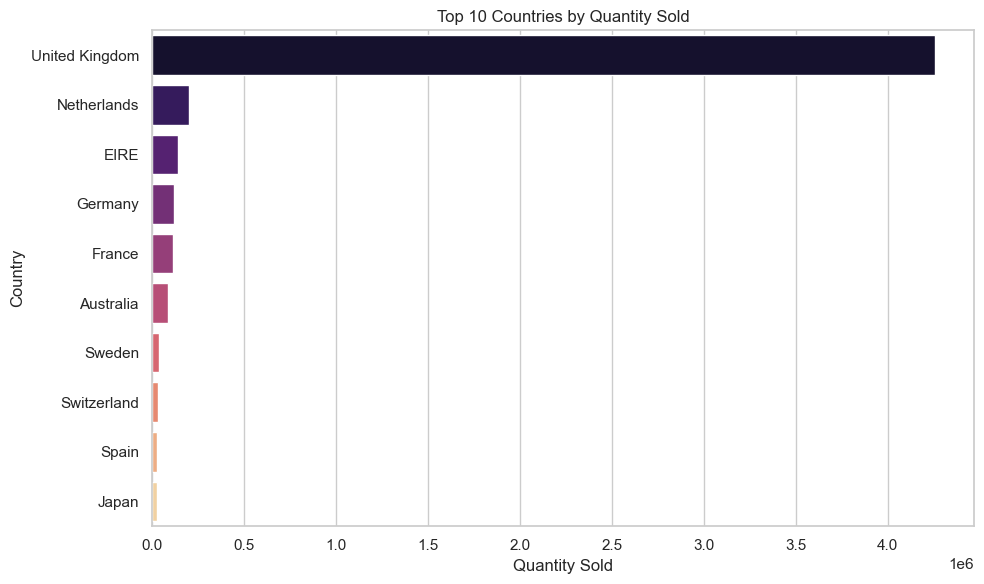

In [22]:
#Top-Selling Countries by Quantity
top_countries = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('Top 10 Countries by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## Task 7:Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.

In [23]:
#Boxplots for Visual Outlier Detection

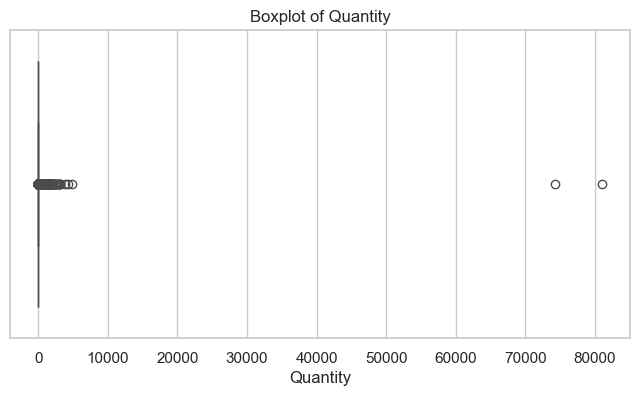

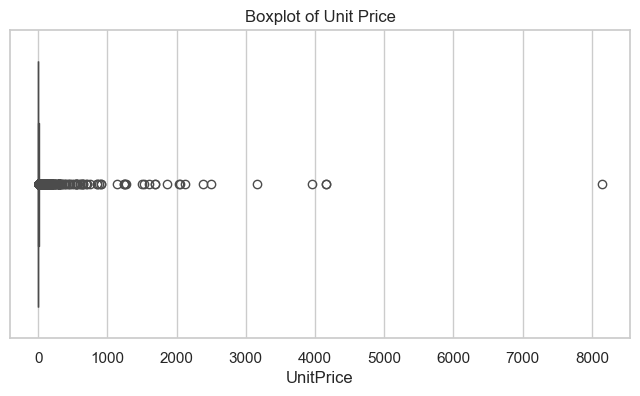

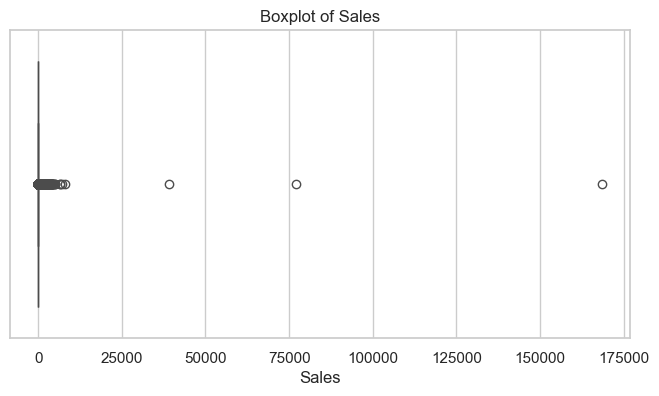

In [24]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

# Unit Price
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['UnitPrice'])
plt.title('Boxplot of Unit Price')
plt.show()

# Sales
df['Sales'] = df['Quantity'] * df['UnitPrice']
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Sales'])
plt.title('Boxplot of Sales')
plt.show()

In [25]:
#IQR Method

def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

# Detect outliers
quantity_outliers = detect_outliers(df['Quantity'])
unitprice_outliers = detect_outliers(df['UnitPrice'])
sales_outliers = detect_outliers(df['Sales'])

print(f"Outliers in Quantity: {len(quantity_outliers)}")
print(f"Outliers in UnitPrice: {len(unitprice_outliers)}")
print(f"Outliers in Sales: {len(sales_outliers)}")

Outliers in Quantity: 25647
Outliers in UnitPrice: 34356
Outliers in Sales: 31241


## Task 8: Conclusions & Summary of Findings

In [26]:
print("""
### 🔍 Summary of Exploratory Data Analysis (EDA)

1. **Sales Trends Over Time**
   - The busiest months for sales are November and December, likely due to holiday shopping.
   - Weekdays, especially Monday and Thursday, show higher sales compared to weekends.

2. **Top-Selling Products and Countries**
   - A small group of products (e.g., popular home decor and gift items) account for a large portion of total sales.
   - The United Kingdom dominates the dataset, contributing the majority of the transactions and revenue.

3. **Customer Behavior Insights**
   - Some customers make very large purchases, which may represent wholesale or corporate orders.

4. **Outliers and Anomalies**
   - Unusually high quantities and prices were detected using both boxplots and the IQR method.
   - These anomalies can skew average values and affect trends, and may indicate either valid bulk purchases or data issues.

---

### ✅ Final Conclusion

This exploratory analysis provides strong insights into sales seasonality, product popularity, and geographic distribution.
These insights can help guide inventory planning, targeted marketing (especially during peak months), and data cleaning efforts for more accurate forecasting.
""")


### 🔍 Summary of Exploratory Data Analysis (EDA)

1. **Sales Trends Over Time**
   - The busiest months for sales are November and December, likely due to holiday shopping.
   - Weekdays, especially Monday and Thursday, show higher sales compared to weekends.

2. **Top-Selling Products and Countries**
   - A small group of products (e.g., popular home decor and gift items) account for a large portion of total sales.
   - The United Kingdom dominates the dataset, contributing the majority of the transactions and revenue.

3. **Customer Behavior Insights**
   - Some customers make very large purchases, which may represent wholesale or corporate orders.

4. **Outliers and Anomalies**
   - Unusually high quantities and prices were detected using both boxplots and the IQR method.
   - These anomalies can skew average values and affect trends, and may indicate either valid bulk purchases or data issues.

---

### ✅ Final Conclusion

This exploratory analysis provides strong insights into sa